In [1]:
import madrigalWeb.madrigalWeb
import pylab
import numpy
import h5py
import datetime
import dateutil.parser
import calendar
import re
%matplotlib inline

In [2]:
#CHANGE ME
user_fullname = "Student Example"
user_email = "isr.summer.school@gmail.com"
user_affiliation = "ISR Summer School 2022"

maddat = madrigalWeb.madrigalWeb.MadrigalData('http://cedar.openmadrigal.org/')

In [3]:
# instrument codes for Millstone Hill
instcodes={'MHO':30}

In [4]:
# start time
st=datetime.datetime(2022, 3, 31, 0,0)
et=datetime.datetime(2022, 4, 1, 0,0)

expList = maddat.getExperiments(instcodes['MHO'], 
                                st.year, st.month, st.day, st.hour, st.minute, st.second, 
                                et.year, et.month, et.day, et.hour, et.minute, et.second)
for exp in expList:
    print(exp)

id: 100239875
realUrl: http://cedar.openmadrigal.org/showExperiment/?experiment_list=100239875
url: http://cedar.openmadrigal.org/madtoc/experiments5/2022/mlh/31mar22
name: CME Experiment
siteid: 10
sitename: CEDAR
instcode: 30
instname: Millstone Hill IS Radar
startyear: 2022
startmonth: 3
startday: 31
starthour: 0
startmin: 6
startsec: 46
endyear: 2022
endmonth: 4
endday: 1
endhour: 3
endmin: 58
endsec: 48
isLocal: True
madrigalUrl: http://cedar.openmadrigal.org/
PI: Phil Erickson
PIEmail: perickson@haystack.mit.edu
uttimestamp: 1653997089
access: 2
Madrigal version: 3.2

id: 100239876
realUrl: http://cedar.openmadrigal.org/showExperiment/?experiment_list=100239876
url: http://cedar.openmadrigal.org/madtoc/experiments5/2022/mlh/31mar22a
name: Alternate processing using USRP receiver - not for science use
siteid: 10
sitename: CEDAR
instcode: 30
instname: Millstone Hill IS Radar
startyear: 2022
startmonth: 3
startday: 31
starthour: 0
startmin: 6
startsec: 46
endyear: 2022
endmonth: 4
e

In [5]:
# select first experiment (regular ion line parameters)
thisExp = expList[0]

In [6]:
# survey all experiment files available
fileList = maddat.getExperimentFiles(thisExp.id)
thisFile=None
for file in fileList:
    print(file.kindatdesc)

Gridded data fitted to a uniform spatial and temporal grid - useful for modellers
Derived vector ion velocities
Combined basic parameters file - all antennas and modes
Zenith single-pulse basic parameters
Zenith alternating-code basic parameters
MISA (steerable) single-pulse basic parameters


In [7]:
# Select the correct experiment file (All basic parameters regardless of antenna)
fileList = maddat.getExperimentFiles(thisExp.id)
thisFile=None
for file in fileList:
    if re.match('Combined basic parameters',file.kindatdesc):
        print('Using: %s' % (file))
        thisFile=file
        break

Using: name: /opt/cedar3/experiments5/2022/mlh/31mar22/mlh220331g.003.hdf5
kindat: 3410
kindatdesc: Combined basic parameters file - all antennas and modes
category: 1
status: Final
permission: 0
expId: 100239875
doi: https://w3id.org/cedar?experiment_list=experiments5/2022/mlh/31mar22&file_list=mlh220331g.003.hdf5



In [8]:
# Download the file (should end up in this folder)       
filename=thisFile.name
outfilename=thisFile.name.split('/')[-1]
result = maddat.downloadFile(filename,outfilename, user_fullname, user_email, user_affiliation, 'hdf5')

In [9]:
# Load file and get data table
hz = h5py.File(outfilename,'r')
hztl = hz['Data']['Table Layout']

In [10]:
# Survey the radar pulse lengths in this experiment
print('Unique pulse lengths in sec: %s' % (list(set(hztl['pl']))))

Unique pulse lengths in sec: [0.00128, 0.00048]


In [11]:
# List variables available
print(hztl.dtype)

[('year', '<f8'), ('month', '<f8'), ('day', '<f8'), ('hour', '<f8'), ('min', '<f8'), ('sec', '<f8'), ('recno', '<f8'), ('kindat', '<f8'), ('kinst', '<f8'), ('ut1_unix', '<f8'), ('ut2_unix', '<f8'), ('range', '<f8'), ('pl', '<f8'), ('mdtyp', '<f8'), ('az1', '<f8'), ('az2', '<f8'), ('el1', '<f8'), ('el2', '<f8'), ('systmp', '<f8'), ('pnrmd', '<f8'), ('power', '<f8'), ('pulf', '<f8'), ('dtau', '<f8'), ('ipp', '<f8'), ('tfreq', '<f8'), ('vtx', '<f8'), ('dvtx', '<f8'), ('scntyp', '<f8'), ('cycn', '<f8'), ('posn', '<f8'), ('mresl', '<f8'), ('sn', '<f8'), ('wchsq', '<f8'), ('gfit', '<f8'), ('fpi_dataqual', '<f8'), ('ti', '<f8'), ('dti', '<f8'), ('tr', '<f8'), ('dtr', '<f8'), ('popl', '<f8'), ('dpopl', '<f8'), ('ph+', '<f8'), ('dph+', '<f8'), ('fa', '<f8'), ('dfa', '<f8'), ('co', '<f8'), ('dco', '<f8'), ('pm', '<f8'), ('dpm', '<f8'), ('vo', '<f8'), ('dvo', '<f8'), ('vdopp', '<f8'), ('dvdopp', '<f8'), ('tibf', '<f8'), ('dtibf', '<f8'), ('trbf', '<f8'), ('dtrbf', '<f8'), ('fit_type', '<f8'), ('c

In [12]:
# antenna codes for Millstone Hill
antcodes={'Zenith':32,
           'MISA':31}

In [13]:
# waveform mode types for Millstone Hill
modecodes={'Uncoded480':115,
           'AC_480_16baud_strong':97}

In [14]:
# Define time subset
t1 = calendar.timegm(dateutil.parser.parse('2022-03-31T00:00:00').timetuple())
t2 = calendar.timegm(dateutil.parser.parse('2022-03-31T10:00:00').timetuple())

In [15]:
# Select the 480 usec uncoded pulse from the zenith at the desired times
indx = numpy.where(numpy.logical_and(hztl['mdtyp'] == modecodes['Uncoded480'],
                                    hztl['kinst'] == antcodes['Zenith']))[0]
hztl = hztl[indx]
indx = numpy.where(numpy.logical_and(hztl['ut1_unix'] >= t1,
                                     hztl['ut2_unix'] <= t2))[0]
hztl = hztl[indx]

In [16]:
# Build a time array
ut = 0.5*(hztl['ut1_unix'] + hztl['ut2_unix'])
dut = numpy.array([datetime.datetime.utcfromtimestamp(uut) for uut in ut])

In [17]:
# Electron density:
# Construct X and Y meshgrid arrays for 2D plot and extract data for plotting
tcount = len(set(ut))
X = numpy.array(hztl['gdalt'])
X = X.reshape(tcount,-1)
Y = numpy.array(dut)
Y = Y.reshape(tcount,-1)

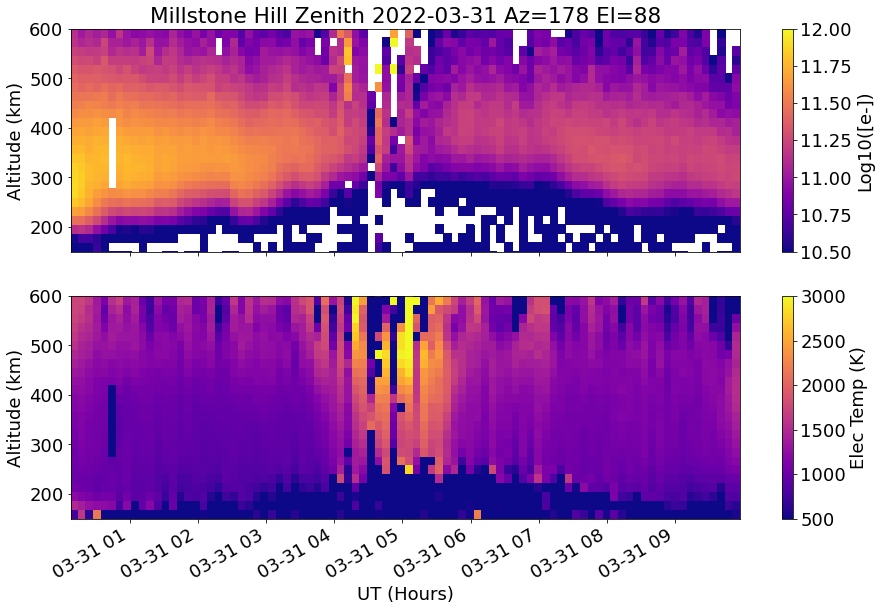

In [18]:
# Make dual panel figure
pylab.rcParams['figure.figsize']=(15,10)
pylab.rcParams['font.size']=18
f,ax = pylab.subplots(2,1,sharex=True)

Z = numpy.log10(hztl['ne'])
Z = Z.reshape(X.shape)
am = ax[0].pcolor(Y, X, Z, vmin=10.5, vmax=12, cmap='plasma')
ax[0].set_ylim(150,600)
f.colorbar(am, ax=ax[0], label='Log10([e-])')
ax[0].set_ylabel('Altitude (km)')
ax[0].set_title('Millstone Hill Zenith %s Az=%.0f El=%.0f' % (dut[0].strftime('%Y-%m-%d'),
                                                           hztl['az1'][0],
                                                           hztl['el1'][0]))

Z = hztl['ti']*hztl['tr']
Z = Z.reshape(X.shape)
am = ax[1].pcolor(Y, X, Z, vmin=500, vmax=3000, cmap='plasma')
ax[1].set_ylim(150,600)
f.colorbar(am, ax=ax[1], label='Elec Temp (K)')
ax[1].set_ylabel('Altitude (km)')
ax[1].set_xlabel('UT (Hours)')

f.autofmt_xdate()

In [19]:
# Reload file and get data table
hz = h5py.File(outfilename,'r')
hztl = hz['Data']['Table Layout']

In [20]:
# Select the 480 usec uncoded pulse from the MISA at the desired times
indx = numpy.where(numpy.logical_and(hztl['mdtyp'] == modecodes['Uncoded480'],
                                    hztl['kinst'] == antcodes['MISA']))[0]
hztl = hztl[indx]
indx = numpy.where(numpy.logical_and(hztl['ut1_unix'] >= t1,
                                     hztl['ut2_unix'] <= t2))[0]
hztl = hztl[indx]

In [21]:
# Build a time array
ut = 0.5*(hztl['ut1_unix'] + hztl['ut2_unix'])
dut = numpy.array([datetime.datetime.utcfromtimestamp(uut) for uut in ut])

In [22]:
# Construct arrays for 2D plot
tcount = len(set(ut))
X = numpy.array(hztl['gdalt'])
X = X.reshape(tcount,-1)
Y = numpy.array(dut)
Y = Y.reshape(tcount,-1)

/var/folders/fv/q7qf8rjn6zdd37k3vttxspjw0000gp/T/ipykernel_36938/1751258535.py:8: UserWarning: The input coordinates to pcolor are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolor.
  am = ax[0].pcolor(Y, X, Z, vmin=10.5, vmax=12, cmap='plasma')
/var/folders/fv/q7qf8rjn6zdd37k3vttxspjw0000gp/T/ipykernel_36938/1751258535.py:18: UserWarning: The input coordinates to pcolor are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolor.
  am = ax[1].pcolor(Y, X, Z, vmin=500, vmax=3000, cmap='plasma')


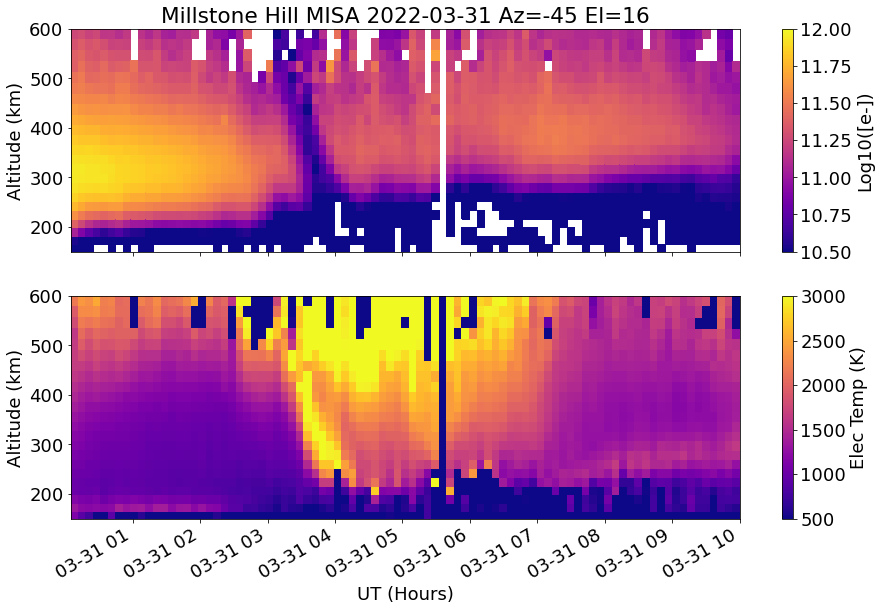

In [23]:
# Make dual panel figure
pylab.rcParams['figure.figsize']=(15,10)
pylab.rcParams['font.size']=18
f,ax = pylab.subplots(2,1,sharex=True)

Z = numpy.log10(hztl['ne'])
Z = Z.reshape(X.shape)
am = ax[0].pcolor(Y, X, Z, vmin=10.5, vmax=12, cmap='plasma')
ax[0].set_ylim(150,600)
f.colorbar(am, ax=ax[0], label='Log10([e-])')
ax[0].set_ylabel('Altitude (km)')
ax[0].set_title('Millstone Hill MISA %s Az=%.0f El=%.0f' % (dut[0].strftime('%Y-%m-%d'),
                                                           hztl['az1'][0],
                                                           hztl['el1'][0]))

Z = hztl['ti']*hztl['tr']
Z = Z.reshape(X.shape)
am = ax[1].pcolor(Y, X, Z, vmin=500, vmax=3000, cmap='plasma')
ax[1].set_ylim(150,600)
f.colorbar(am, ax=ax[1], label='Elec Temp (K)')
ax[1].set_ylabel('Altitude (km)')
ax[1].set_xlabel('UT (Hours)')

f.autofmt_xdate()

/var/folders/fv/q7qf8rjn6zdd37k3vttxspjw0000gp/T/ipykernel_36938/2940703498.py:8: UserWarning: The input coordinates to pcolor are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolor.
  am = ax[0].pcolor(Y, X, Z, vmin=10.5, vmax=12, cmap='plasma')
/var/folders/fv/q7qf8rjn6zdd37k3vttxspjw0000gp/T/ipykernel_36938/2940703498.py:18: UserWarning: The input coordinates to pcolor are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolor.
  am = ax[1].pcolor(Y, X, Z, vmin=0, vmax=400, cmap='plasma')


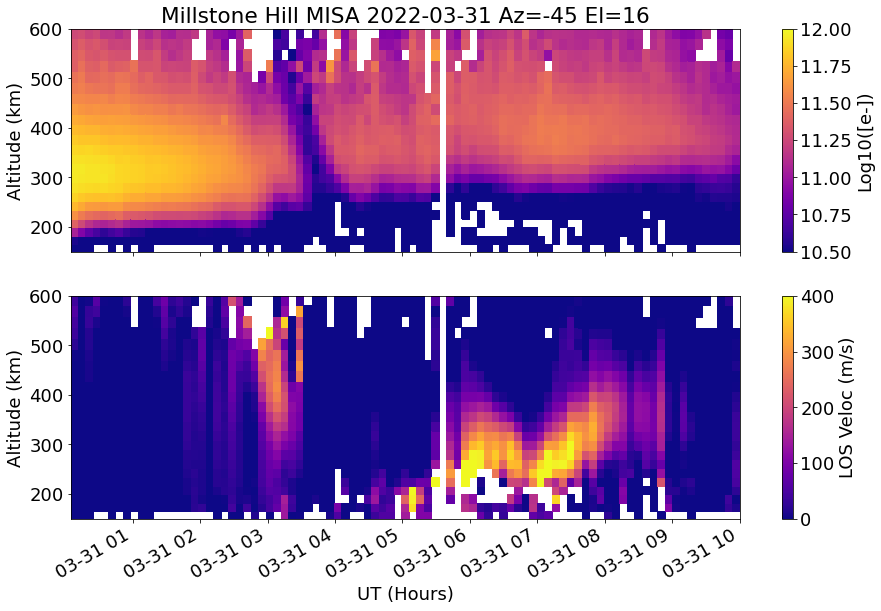

In [24]:
# Make dual panel figure, this time with LOS velocity
pylab.rcParams['figure.figsize']=(15,10)
pylab.rcParams['font.size']=18
f,ax = pylab.subplots(2,1,sharex=True)

Z = numpy.log10(hztl['ne'])
Z = Z.reshape(X.shape)
am = ax[0].pcolor(Y, X, Z, vmin=10.5, vmax=12, cmap='plasma')
ax[0].set_ylim(150,600)
f.colorbar(am, ax=ax[0], label='Log10([e-])')
ax[0].set_ylabel('Altitude (km)')
ax[0].set_title('Millstone Hill MISA %s Az=%.0f El=%.0f' % (dut[0].strftime('%Y-%m-%d'),
                                                           hztl['az1'][0],
                                                           hztl['el1'][0]))

Z = hztl['vo']
Z = Z.reshape(X.shape)
am = ax[1].pcolor(Y, X, Z, vmin=0, vmax=400, cmap='plasma')
ax[1].set_ylim(150,600)
f.colorbar(am, ax=ax[1], label='LOS Veloc (m/s)')
ax[1].set_ylabel('Altitude (km)')
ax[1].set_xlabel('UT (Hours)')

f.autofmt_xdate()

# Questions

1. What are possible explanations for the difference in zenith and MISA observations around 04 UT?  

2. Why is the electron temperature suddenly elevated in both antennas around this time?

3. What does the LOS velocity on the MISA indicate about the event?